In [ ]:
import torch
print(torch.__version__)   # kiểm tra phiên bản
print(torch.cuda.is_available())  # kiểm tra có GPU CUDA không


2.8.0+cu126
False


# ▶ Tensor


---
<p font-family-monospace: "SFMono-Regular"> Đã biết tensorflow và keras thường dùng kiểu dữ liệu numpy. Pytorch thì khác , nó sử dụng kiểu dữ liệu Tensor, về cơ bản thì 2 kiểu dữ liệu này tương tự và có thể chuyển đổi qua lại cho nhau, nhưng Tensor nó có thể thực hiện đơn giản trên GPU giúp cho tiến trình huấn luyện mô hình nhanh hơn. Nó cũng cung cấp cho mô hình khả năng tự động tính toán backpropagation trong việc xây dựng mạng neural network. Tóm lại thì Pytorch có kết cục chặt chẽ hơn so với Numpy/Scipy, so với Tensorflow và các frameworks khác. Vậy chúng ta hãy xem Tensor là gì ?
</p>

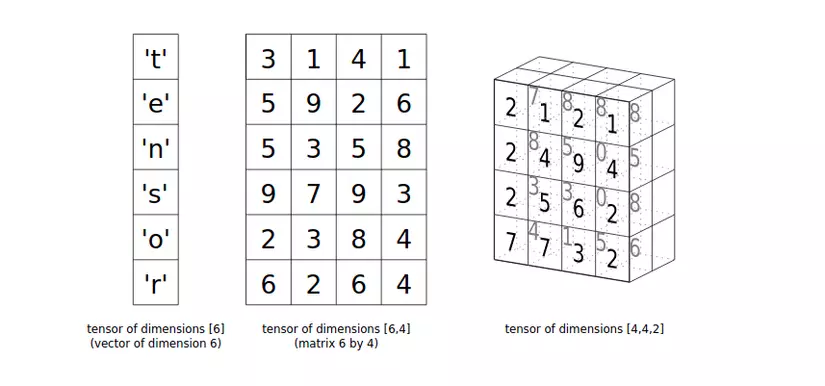

Hiểu một cách đơn giản thì 1 vector đó cũng là 1 tensor 1 chiều, 1 ma trận cũng là 1 tensor 2 chiều, 1 array 3 indices cũng là tensor 3 chiều (bức ảnh màu RGB cũng là 1 ví dụ).


---






## Create tensor by manual_seed to things are predictable

In [ ]:
# First, import PyTorch
import torch
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable
# Features are 5 random normal variables
features = torch.randn((1, 5))
# create argument a is Tensor([1,2])
a = torch.Tensor([1,2])

print(features)
print(features)
print(a)
print(a)
a.numpy()

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([1., 2.])
tensor([1., 2.])


array([1., 2.], dtype=float32)

- Chuyển đổi kiểu dữ liệu Tensor sang Numpy bằng hàm .numpy() và ngược lại chuyển từ kiểu numpy sang Tensor bằng hàm torch.from_numpy() như  dưới:

In [ ]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.68220753, 0.84620037, 0.93067765],
       [0.67612115, 0.31384832, 0.85600304],
       [0.51505355, 0.27004841, 0.53178788],
       [0.19163738, 0.84068641, 0.52742782]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.6822, 0.8462, 0.9307],
        [0.6761, 0.3138, 0.8560],
        [0.5151, 0.2700, 0.5318],
        [0.1916, 0.8407, 0.5274]], dtype=torch.float64)

In [ ]:
b.numpy()

array([[0.68220753, 0.84620037, 0.93067765],
       [0.67612115, 0.31384832, 0.85600304],
       [0.51505355, 0.27004841, 0.53178788],
       [0.19163738, 0.84068641, 0.52742782]])

In [ ]:
a.reshape(1,-1)

array([[0.68220753, 0.84620037, 0.93067765, 0.67612115, 0.31384832,
        0.85600304, 0.51505355, 0.27004841, 0.53178788, 0.19163738,
        0.84068641, 0.52742782]])

In [ ]:
# Multiply PyTorch Tensor by 2, in place (Nhân PyTorch Tensor với 2, tại chỗ)
b.mul_(2)

tensor([[1.3644, 1.6924, 1.8614],
        [1.3522, 0.6277, 1.7120],
        [1.0301, 0.5401, 1.0636],
        [0.3833, 1.6814, 1.0549]], dtype=torch.float64)

## Stack them up! (Xếp chồng lên)

That's how you can calculate the output for a single neuron. The real power of this algorithm happens when you start stacking these individual units into layers and stacks of layers, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. With multiple input units and output units, we now need to express the weights as a matrix.

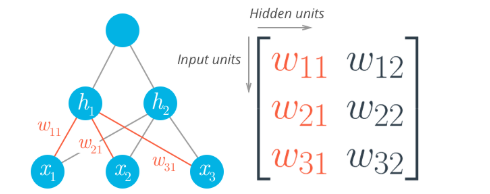

The first layer shown on the bottom here are the inputs, understandably called the input layer. The middle layer is called the hidden layer, and the final layer (on the right) is the output layer. We can express this network mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer (
 and
 here) can be calculated

 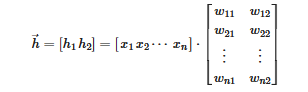

 The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply

image.png


In [ ]:
torch.manual_seed(7) # Set the random seed so things are predictable

features = torch.randn((1,3)) # 1 x 3

n_input = features.shape[1]
n_hidden = 2
n_output = 1

W1 = torch.randn(n_input, n_hidden) # 3 x 2
W2 = torch.randn(n_hidden, n_output) # 2 x 1

B1 = torch.randn((1, n_hidden)) # 1 x 2
B2 = torch.randn((1, n_output)) # 1 x 1
print(features)
print(n_input)

tensor([[-0.1468,  0.7861,  0.9468]])
3


❗ Exercise: Calculate the output for this multi-layer network using the weights W1 & W2, and the biases, B1 & B2.

In [ ]:
def activation(x):
    """ Sigmoid activation function

        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [ ]:
h = activation(torch.mm(features , W1) + B1 ) # 1 x 2
output = activation(torch.mm(h, W2) + B2) # 1 x 1
print(output)

tensor([[0.3171]])




---


torch.mm(input, mat2, out_dtype=None, *, out=None)
nhân 2 matrix input với mat2


---



# ▶ Neural Networks with Pytorch



---
Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module (nn) that provides a nice way to efficiently build large neural networks.

Các mạng học sâu thường rất đồ sộ với hàng chục hoặc hàng trăm lớp, đó là lý do thuật ngữ "sâu" ra đời. Bạn có thể xây dựng một trong những mạng học sâu này chỉ bằng cách sử dụng ma trận trọng số như chúng ta đã làm trong sổ tay trước, nhưng nhìn chung, việc triển khai rất phức tạp và khó khăn. PyTorch có một mô-đun (nn) rất hay, cung cấp một cách hiệu quả để xây dựng các mạng nơ-ron lớn.

---






---


torch.nn là gì?

torch = thư viện PyTorch tổng quát.

torch.nn = neural network module của PyTorch.
Nó chứa:

Các layer (lớp mạng) như nn.Linear, nn.Conv2d, nn.ReLU, nn.Dropout…

Loss functions như nn.CrossEntropyLoss, nn.MSELoss.

Module base class nn.Module → tất cả model bạn định nghĩa sẽ kế thừa từ đây.

Nói ngắn: torch.nn là “hộp đồ nghề” để xây dựng neural network trong PyTorch.


---



Xây dựng một larger network để nhận diện chữ trong hình ảnh. Ở đây sẽ sử dụng dataset MNIST chữ số viết tay ở thang đo xám. Ảnh gồm 28x28 pixels

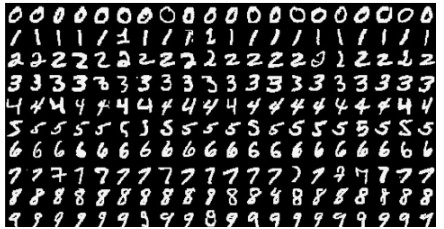




In [ ]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

Bộ dữ liệu đã được cung cấp qua gói torchvision. Code dưới là download MNIST và sau đó tạo tập traning và test

datasets: chứa các dataset nổi tiếng (MNIST, CIFAR10, ImageNet…).

transforms: dùng để biến đổi ảnh (resize, normalize, convert to tensor…).

In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 43.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 97.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.85MB/s]



ToTensor(): chuyển ảnh từ [0, 255] thành tensor [0, 1].

Normalize((0.5,), (0.5,)): chuẩn hóa dữ liệu về khoảng [-1, 1].

train=True → tải tập train (60.000 ảnh).

download=True → tự động tải nếu chưa có.

transform=... → áp dụng tiền xử lý ở trên.

DataLoader giúp chia dữ liệu thành batch (ở đây mỗi batch = 64 ảnh).

shuffle=True: xáo trộn dữ liệu mỗi epoch để tránh overfitting.

---



In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


images: tensor chứa 64 ảnh (mỗi ảnh 28×28).

labels: tensor chứa nhãn (số từ 0–9).

---
.numpy().squeeze(): chuyển tensor về numpy và bỏ chiều dư.

images[1]: lấy ảnh thứ 2 trong batch.

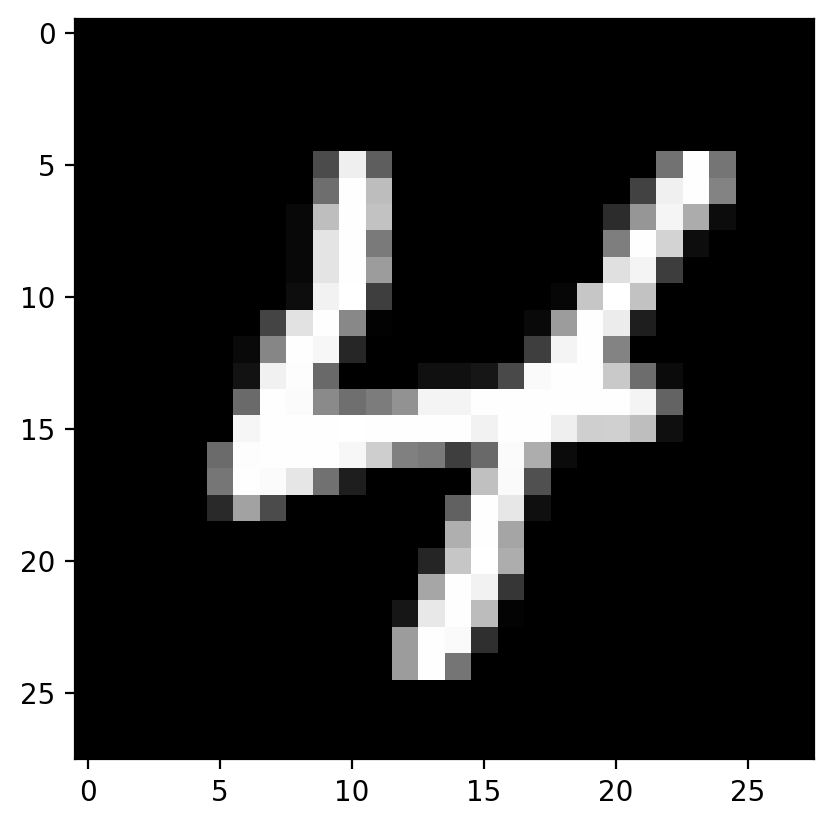

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:
def activate_sigmoid(x):
  return 1 / (1 + torch.exp(-x) )

inputs = images.view(images.shape[0], -1) # giống như reshape trong numpy | -1 ở đây là tự tính => [64,784]

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activate_sigmoid(torch.mm(inputs , w1) + b1)
out = torch.mm(h , w2) + b2

## Softmax
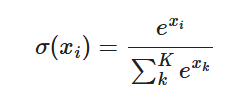

dim = 1 => tính toán theo hàng (ngang)

dim = 0 => tính toán theo cột (dọc xuống)

In [ ]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim = 1 ).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch

### Use from torch import nn

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim = 1 )

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [ ]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)



---

Để định nghĩa hàm một cách rõ ràng và ngắn gọn thì sử dụng module torch.nn.functional. Đây là các phổ biến mà các mạng được định nghĩa như nhiều hoạt động là các hàm đơn giản theo từng phần tử.

Thường thì sẽ import module là F , import torch.nn.functional as F

### Use import torch.nn.functional as F

In [ ]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x),dim = 1 )

    return x

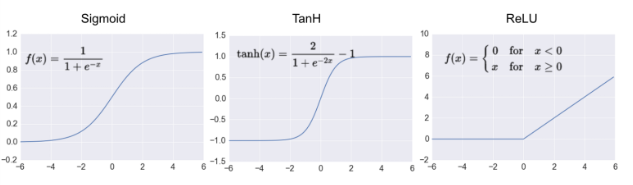

## Exercise: Build a Network

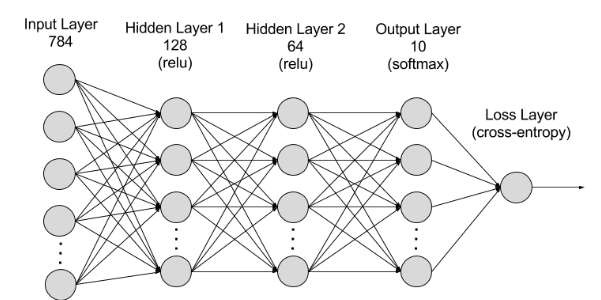



---


 Create a network with 784 input units, a hidden layer with 128 units and a
ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.


---



In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self,x):
      x = F.relu(self.hidden(x))
      x = F.relu(self.hidden2(x))
      x = F.log_softmax(self.output(x), dim=1)

      return x

In [ ]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
print(model.hidden.weight)
print(model.hidden.bias)

Parameter containing:
tensor([[-0.0290,  0.0293, -0.0350,  ..., -0.0278, -0.0253,  0.0169],
        [-0.0145,  0.0053, -0.0077,  ...,  0.0342, -0.0050, -0.0356],
        [-0.0100,  0.0021, -0.0317,  ..., -0.0058, -0.0195,  0.0264],
        ...,
        [-0.0226,  0.0031, -0.0182,  ...,  0.0258,  0.0128, -0.0173],
        [ 0.0040, -0.0259, -0.0081,  ...,  0.0350,  0.0277, -0.0146],
        [-0.0194,  0.0229, -0.0251,  ..., -0.0078,  0.0200, -0.0010]],
       requires_grad=True)
Parameter containing:
tensor([-0.0211, -0.0179,  0.0209, -0.0195, -0.0013, -0.0060,  0.0254,  0.0216,
         0.0143,  0.0235,  0.0172, -0.0250,  0.0031, -0.0264, -0.0080,  0.0323,
        -0.0072, -0.0295,  0.0325,  0.0348, -0.0122, -0.0065,  0.0116, -0.0327,
        -0.0236, -0.0204, -0.0025,  0.0022, -0.0015,  0.0216, -0.0288, -0.0084,
        -0.0131, -0.0274, -0.0086, -0.0031,  0.0167,  0.0128, -0.0217, -0.0139,
         0.0241, -0.0220,  0.0139,  0.0068, -0.0137, -0.0246, -0.0335,  0.0240,
         0.0123

In [ ]:
model.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01)

tensor([[ 0.0044,  0.0073,  0.0002,  ...,  0.0110, -0.0147, -0.0036],
        [ 0.0017,  0.0049, -0.0055,  ..., -0.0075,  0.0244,  0.0047],
        [ 0.0028, -0.0113, -0.0026,  ..., -0.0017,  0.0027,  0.0015],
        ...,
        [-0.0128,  0.0168,  0.0029,  ..., -0.0011, -0.0086, -0.0086],
        [-0.0046,  0.0214,  0.0006,  ..., -0.0109, -0.0004,  0.0112],
        [-0.0106, -0.0097, -0.0072,  ...,  0.0055, -0.0051,  0.0086]])

## Forward pass

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    '''
    img: tensor ảnh (shape: 1x28x28)
    ps: tensor xác suất dự đoán (shape: 1x10)
    '''
    ps = ps.cpu().data.numpy().squeeze()  # chuyển về numpy

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)

    # Hiển thị ảnh gốc
    ax1.imshow(img.cpu().numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax1.set_title("Input Image")

    # Vẽ biểu đồ cột xác suất
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))  # label các class (0-9)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()


In [ ]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Placeholder for view_classify function.
Image shape: torch.Size([1, 28, 28])
Probabilities shape: torch.Size([1, 10])


## Using nn.Sequential

Sử dụng [nn.Sequential](https://docs.pytorch.org/docs/main/nn.html#torch.nn.Sequential) để xây dựng các mạng tương đương

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
Placeholder for view_classify function.
Image shape: torch.Size([1, 28, 28])
Probabilities shape: torch.Size([1, 10])


In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0171, -0.0306, -0.0259,  ..., -0.0312,  0.0337,  0.0011],
        [-0.0213, -0.0075,  0.0198,  ..., -0.0212, -0.0311, -0.0052],
        [-0.0343, -0.0115, -0.0106,  ...,  0.0180, -0.0347, -0.0036],
        ...,
        [ 0.0140, -0.0127, -0.0016,  ..., -0.0086, -0.0098, -0.0231],
        [-0.0092,  0.0251,  0.0005,  ..., -0.0204,  0.0105,  0.0175],
        [-0.0264, -0.0249,  0.0155,  ..., -0.0334,  0.0005,  0.0143]],
       requires_grad=True)

## OrderedDict để đặt tên cho từng lớp

Cũng có thể truyền vào OrderedDict để đặt tên cho từng lớp và thao tác riêng lẻ, thay vì sử dụng số nguyên gia tăng. Lưu ý rằng khóa từ điển phải là duy nhất, vì vậy mỗi thao tác phải có một tên khác nhau.

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


# ▶ Training Neural Networks

## Use nn.CrossEntropyLoss()

This means we need to pass in the raw output of our network into the loss, not the output of the softmax function. This raw output is usually called the logits or scores. We use the logits because softmax gives you probabilities which will often be very close to zero or one but floating-point numbers can't accurately represent values near zero or one (read more here). It's usually best to avoid doing calculations with probabilities, typically we use log-probabilities.

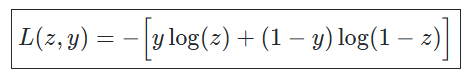

In [ ]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)
print(loss)

tensor(2.3031, grad_fn=<NllLossBackward0>)


## Use negative log likelihood loss, nn.NLLLoss

Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately. dim=0 calculates softmax across the rows, so each column sums to 1, while dim=1 calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss() # criterion = tieu chi
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1 )
logps = model(images)
loss = criterion(logps, labels)
print(loss)

tensor(2.3008, grad_fn=<NllLossBackward0>)




---



## Khác nhau giữa CrossEntropy và Negative Log Likelihood

CrossEntropyLoss

* Input: logits (giá trị thô từ Linear, chưa softmax, chưa log).

* Bên trong: PyTorch sẽ tự động tính LogSoftmax rồi áp dụng NLLLoss.

* Thường dùng: khi bạn không muốn tự viết softmax/log-softmax trong forward.

NLLLoss

* Input: log-probabilities (đầu vào phải là log, không phải logits thô).

* Bạn phải tự log-softmax trước trong forward.

* Thường dùng: khi bạn muốn chủ động kiểm soát activation ở cuối (ví dụ muốn rõ ràng rằng bạn đang làm việc với log_softmax).

So sánh trực diện
* CrossEntropyLoss = LogSoftmax + NLLLoss gộp lại thành một hàm, tiện lợi và giảm sai sót số học (numerical stability).

* NLLLoss thì bạn phải tự thêm log_softmax trong mạng.

* Kết quả toán học giống nhau, chỉ khác chỗ bạn viết ở đâu.



---



## Autograd

Autogard là cơ chế của Pytorch giúp tự động tính toán đạo hàm (gradients) cho tensor. Dùng nhiều nhất khi train mạng neural: cần đạo hàm của los theo từng trọng số


---





requires_grad = True

* Khi tạo tensoe và gắn requires_grad = True, Pytorch sẽ theo dõi mọi phép toán thực hiện với tensor này.
* Nhờ đó, khi gọi .backward(), nó có thể lan truyền ngược để tính gradient.


---








Tắt gradient bằng torch.no_grad()


* Trong nhiều tình huống (ví dụ inference), bạn không cần gradient. (tại lớp đầu ra thì không cần gradient chỉ cần chạy thẳng đầu vào qua model)

* Dùng with torch.no_grad(): để tiết kiệm bộ nhớ và tốc độ.


---



Bật/tắt gradient toàn cục

* Dùng torch.set_grad_enabled(True|False).

* Đây giống như công tắc tổng, áp dụng cho toàn bộ code block.


---



.backward()

* Khi bạn có một biến z (thường là loss), gọi z.backward() sẽ lan truyền ngược qua tất cả phép toán đã được theo dõi.

* Kết quả: mỗi tensor x có requires_grad=True sẽ chứa gradient trong x.grad.


---



Tại sao phải "theo dõi" gradient

Trong PyTorch:

* Mỗi khi bạn thực hiện phép toán trên tensor (cộng, nhân, ma trận, hàm sigmoid, …), autograd sẽ ghi lại vào một đồ thị tính toán (computation graph).

* Khi bạn gọi .backward(), PyTorch sẽ đi ngược trên đồ thị này để tính gradient cho từng biến.

=> Nếu không theo dõi, PyTorch không biết bạn đã làm những phép toán gì với tensor, nên không thể tính gradient cho chúng.

In [ ]:
x = torch.randn(2,2, requires_grad = True)
print(x)

tensor([[-0.3309, -1.1176],
        [ 0.0113,  0.6537]], requires_grad=True)


In [ ]:
y = x**2
print(y)

tensor([[1.0950e-01, 1.2491e+00],
        [1.2657e-04, 4.2738e-01]], grad_fn=<PowBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y.mean()
print(z)

tensor(0.4465, grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad)

None




---


Khi bạn tạo tensor y với requires_grad=True, PyTorch chỉ theo dõi các phép toán để chuẩn bị tính gradient.

Nhưng gradient chỉ được lưu vào thuộc tính .grad sau khi bạn gọi .backward().

Nếu bạn chỉ print(y.grad) trước khi gọi z.backward(), thì PyTorch chưa hề tính gradient → nó sẽ trả về None.



---



In [ ]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.1655, -0.5588],
        [ 0.0056,  0.3269]])
tensor([[-0.1655, -0.5588],
        [ 0.0056,  0.3269]], grad_fn=<DivBackward0>)




---

Để tính gradients, cần chạy .backward cho biến z. Cái này sẽ tính gradient cho z với mối quan hệ với x

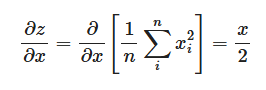



---



Trong trainning, chúng ta cần tính gradients của trọng số với mối quan hệ với cost. Với Pytorch, chúng ra chạy dữ liệu theo chiều xuôi để tính toán loss, sau đó lan truyền ngược để tính gradients với mối quan hệ loss.
Khi đã có độ dốc, thì chúng ta cần làm là bước giảm độ dốc (gradient densent)



---



## Loss and Autograd together

When we create a network with Pytorch, all of the parameters are initalized with requires_grad = True. This means that when we calculate the loss and call loss.backward(), the gradients for the parameters are calculated. These gradients are used to update the weights with gradients denscent.



---


When we are initalized with nn.Linear, then Pytorch will auto initalize weight and bias. That means the learned parameters (weight, bias) are already set to gradient by default -> you don't have to set them manually.

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027]])


## Training the Network!

### from torch import optim

There's one last piece we need to start training (Còn 1 phần cuối cùng chúng ta cần để bắt đầu huấn luyện), an optimizer that we'll use to update the weights with gradients. We get these from Pytorchs optim package. For below example, we can use stochastic gradient denscent with optim.SGD

In [ ]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)



---


Optimizer là gì?

* Sau khi loss.backward() tính ra gradient cho từng tham số (weight, bias), ta cần cập nhật giá trị tham số để giảm loss.

* Optimizer chính là công cụ thực hiện việc cập nhật này theo công thức của một thuật toán tối ưu (SGD, Adam, RMSProp...).


---



<a>Khi nào dùng SGD, Adam, RMSProp, Mometum SGD, AdamW </a>

1. SGD (Stochastic Gradient Descent)

  - Ý tưởng: cập nhật đơn giản nhất:

  - Ưu điểm:

    - Rất cơ bản, dễ hiểu.

    - Thường cho kết quả ổn định và tốt nếu có thời gian tuning learning rate.

    - Ít chiếm bộ nhớ.

  - Nhược điểm:

    - Học chậm, dễ mắc kẹt ở local minima hay plateau (vùng phẳng).

  - Dùng khi nào:

    - Dataset rất lớn (SGD thuần hoặc có momentum).

    - Bạn muốn kiểm soát chặt việc tối ưu.

    - Bài toán “chuẩn sách giáo khoa” (ví dụ MNIST, CIFAR) để học cơ bản.
  
2. Momentum SGD
  - Ý tưởng: thêm "quán tính" để không bị mắc kẹt ở các local minima.
  - Ưu điểm: hội tự nhanh hơn SGD thường.
  - Dùng khi nào: hầu như luôn nên dùng thay cho SGD thuần.

3. RMSProp
  - Ý tưởng: điều chỉnh learning rate cho từng tham số dựa trên trung bình bình phương gradient.

  → Tham số nào có gradient lớn sẽ được giảm tốc, tham số gradient nhỏ thì giữ lại tốc độ.

  - Ưu điểm:

    - Học nhanh hơn trong mạng sâu.

    - Đặc biệt tốt cho RNN hoặc dữ liệu chuỗi dài (xử lý gradient exploding/vanishing).

  - Dùng khi nào:

    - Bạn làm với RNN, LSTM.

    - Bài toán khó tối ưu với SGD (gradient lên xuống bất thường).
4. Adam (Adaptive Moment Estimation)

  - Ý tưởng: kết hợp Momentum + RMSProp.

    - Vừa có quán tính (momentum) vừa điều chỉnh tốc độ học cho từng tham số.

  - Ưu điểm:

    - Phổ biến nhất, thường “cắm vào chạy là được”.

    - Hội tụ nhanh.

  - Nhược điểm:

    - Đôi khi kém chính xác hơn SGD khi training lâu dài (có thể cho kết quả tệ hơn một chút về generalization).

  - Dùng khi nào:

    - Dataset vừa & nhỏ.

    - Muốn nhanh chóng có kết quả baseline.

    - Deep learning hiện đại (NLP, CV, RL) hầu hết đều bắt đầu với Adam.

5. AdamW (phiên bản cải tiến của Adam)

  - Ý tưởng: tách weight decay ra khỏi update rule để regularization tốt hơn.

  - Hiện tại: là best practice trong nhiều mô hình NLP lớn (BERT, GPT).



---



Vòng huấn luyện cơ bản với PyTorch

Mỗi step học gồm 4 bước chính:

1. Forward pass: đưa dữ liệu vào model, lấy output.

2. Loss: so sánh output với nhãn thật để tính loss.

3. Backward pass: gọi loss.backward() để tính gradient.

4. Update step: gọi optimizer.step() để cập nhật weight/bias dựa vào gradient.


---



Vì sao cần optimizer.zero_grad()?

* Trong PyTorch, mỗi lần gọi loss.backward(), gradient sẽ cộng dồn (accumulate) vào .grad của tham số.

* Nếu không reset, gradient từ batch trước sẽ cộng thêm vào batch sau → kết quả sai.

* Vì vậy trước mỗi backward, ta cần xóa gradient cũ:

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0015, -0.0138,  0.0018,  ...,  0.0070, -0.0053,  0.0093],
        [-0.0088, -0.0233, -0.0167,  ...,  0.0017,  0.0255, -0.0040],
        [-0.0244,  0.0118, -0.0356,  ...,  0.0216,  0.0270, -0.0022],
        ...,
        [ 0.0001,  0.0310, -0.0210,  ...,  0.0087,  0.0287, -0.0277],
        [-0.0269, -0.0186, -0.0014,  ...,  0.0312, -0.0035, -0.0176],
        [-0.0056,  0.0210, -0.0144,  ...,  0.0116, -0.0224, -0.0125]],
       requires_grad=True)
Gradient - tensor([[ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]])


In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0015, -0.0138,  0.0018,  ...,  0.0070, -0.0053,  0.0093],
        [-0.0088, -0.0233, -0.0167,  ...,  0.0016,  0.0255, -0.0040],
        [-0.0244,  0.0118, -0.0355,  ...,  0.0216,  0.0270, -0.0022],
        ...,
        [ 0.0001,  0.0310, -0.0210,  ...,  0.0087,  0.0287, -0.0277],
        [-0.0269, -0.0186, -0.0014,  ...,  0.0312, -0.0035, -0.0176],
        [-0.0056,  0.0210, -0.0144,  ...,  0.0116, -0.0224, -0.0125]],
       requires_grad=True)


## Training for real

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.835354091897448
Training loss: 0.770266926205997
Training loss: 0.5001299733768648
Training loss: 0.41941243182939253
Training loss: 0.3806063080552036




---
Cải tiến các bước ở trên


In [ ]:
import torch
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs = 5

for e in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(trainloader, desc=f"Epoch {e+1}/{epochs}"):
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(images.size(0), -1)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)  # accumulate per-sample loss

    epoch_loss = running_loss / len(trainloader.dataset)  # avg loss per sample
    print(f"Epoch {e+1} Train loss (per-sample): {epoch_loss:.6f}")

    # optional: validation here using model.eval() and torch.no_grad()


Epoch 1/5: 100%|██████████| 938/938 [00:17<00:00, 52.43it/s]


Epoch 1 Train loss (per-sample): 0.356091


Epoch 2/5: 100%|██████████| 938/938 [00:18<00:00, 50.00it/s]


Epoch 2 Train loss (per-sample): 0.339071


Epoch 3/5: 100%|██████████| 938/938 [00:18<00:00, 50.92it/s]


Epoch 3 Train loss (per-sample): 0.325658


Epoch 4/5: 100%|██████████| 938/938 [00:18<00:00, 50.58it/s]


Epoch 4 Train loss (per-sample): 0.314145


Epoch 5/5: 100%|██████████| 938/938 [00:17<00:00, 52.68it/s]

Epoch 5 Train loss (per-sample): 0.304901


With the network trained, we can check out it's predictions.

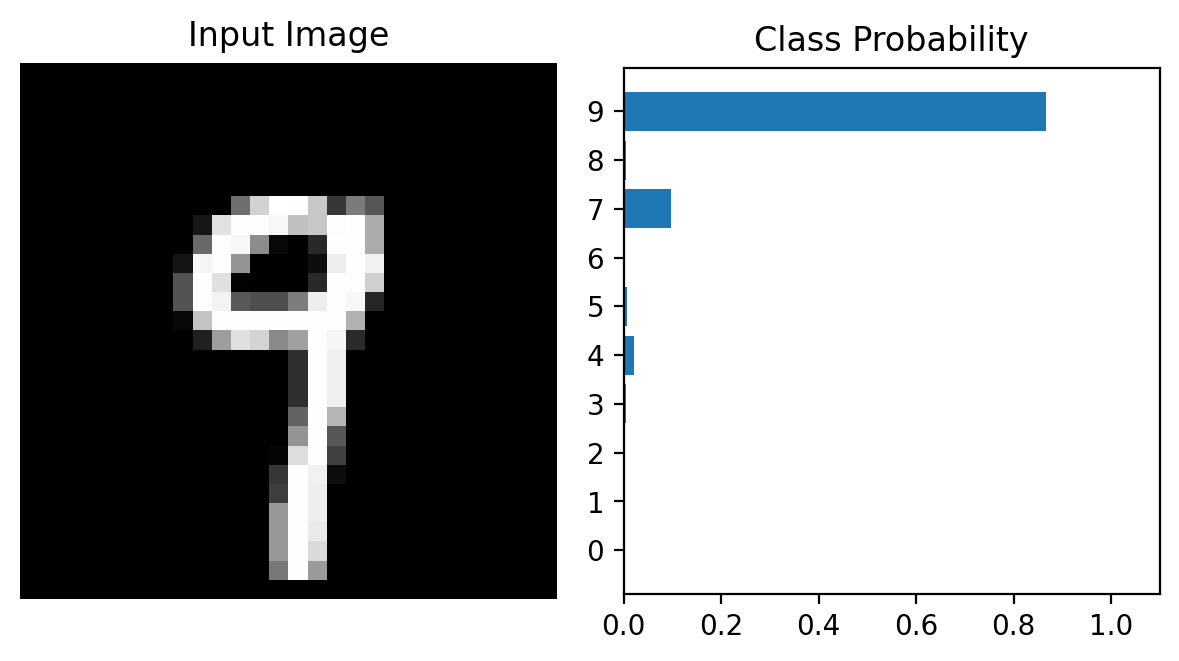

In [ ]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

# ▶ Classifying Fashion-MNIST

You'll be using the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

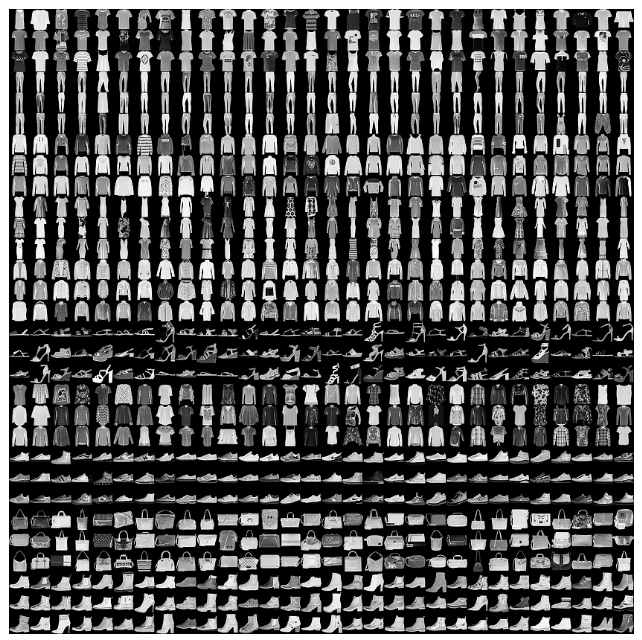



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    '''
    img: tensor ảnh (shape: 1x28x28)
    ps: tensor xác suất dự đoán (shape: 1x10)
    '''
    ps = ps.cpu().data.numpy().squeeze()  # chuyển về numpy

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)

    # Hiển thị ảnh gốc
    ax1.imshow(img.cpu().numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax1.set_title("Input Image")

    # Vẽ biểu đồ cột xác suất
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))  # label các class (0-9)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

torch.Size([64, 1, 28, 28])
torch.Size([64])


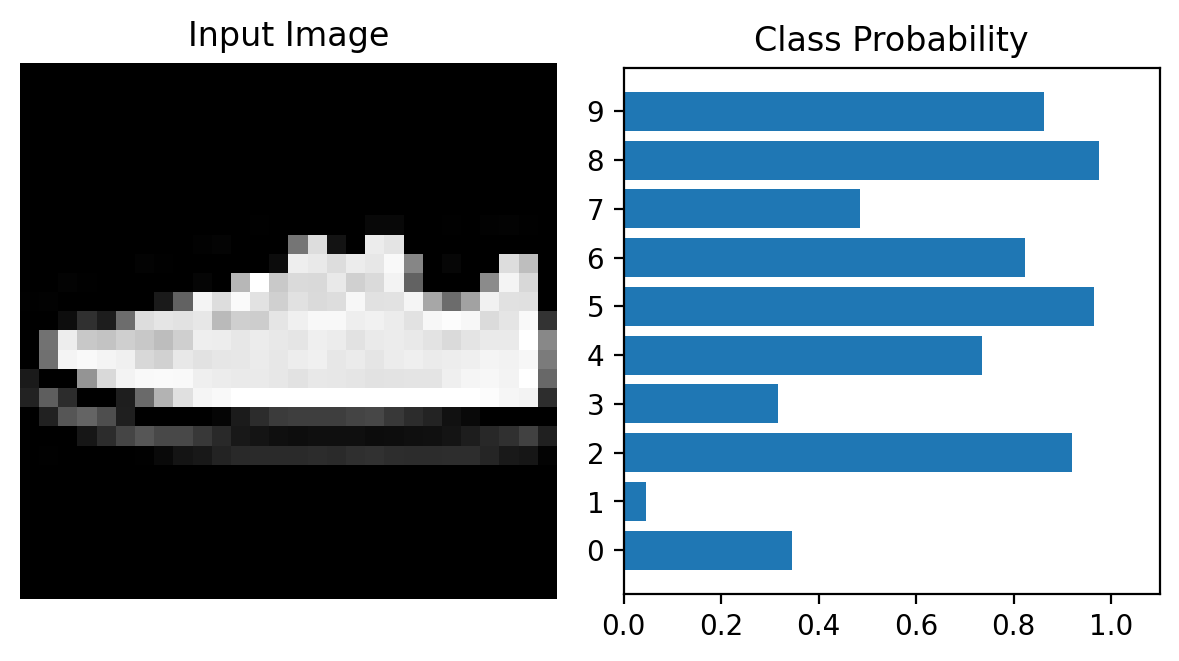

In [ ]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)
view_classify(images[0].view(1, 28, 28), torch.rand(1, 10)) # Using view_classify and a dummy probability tensor for now

## Building the Network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
from torch import nn , optim
import torch.nn.functional as F

from tqdm import tqdm

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
  def forward(self,x):
    x = x.view(x.shape[0],-1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x),dim=1)

    return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

In [ ]:
epochs = 5
for e in range(epochs):
  model.train()
  running_loss = 0
  for images, labels in tqdm(trainloader, desc=f"Epoch {e+1}/{epochs}"):
    optimizer.zero_grad()
    log_ps = model(images)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)
  else:
    print(f"Training loss: {running_loss/len(trainloader.dataset)}")

Epoch 1/5: 100%|██████████| 938/938 [00:18<00:00, 50.46it/s]


Training loss: 0.5131410467545191


Epoch 2/5: 100%|██████████| 938/938 [00:19<00:00, 48.67it/s]


Training loss: 0.37543106495539347


Epoch 3/5: 100%|██████████| 938/938 [00:18<00:00, 50.37it/s]


Training loss: 0.3399580584049225


Epoch 4/5: 100%|██████████| 938/938 [00:19<00:00, 48.46it/s]


Training loss: 0.31416020816961926


Epoch 5/5: 100%|██████████| 938/938 [00:18<00:00, 49.88it/s]

Training loss: 0.29181825726032257


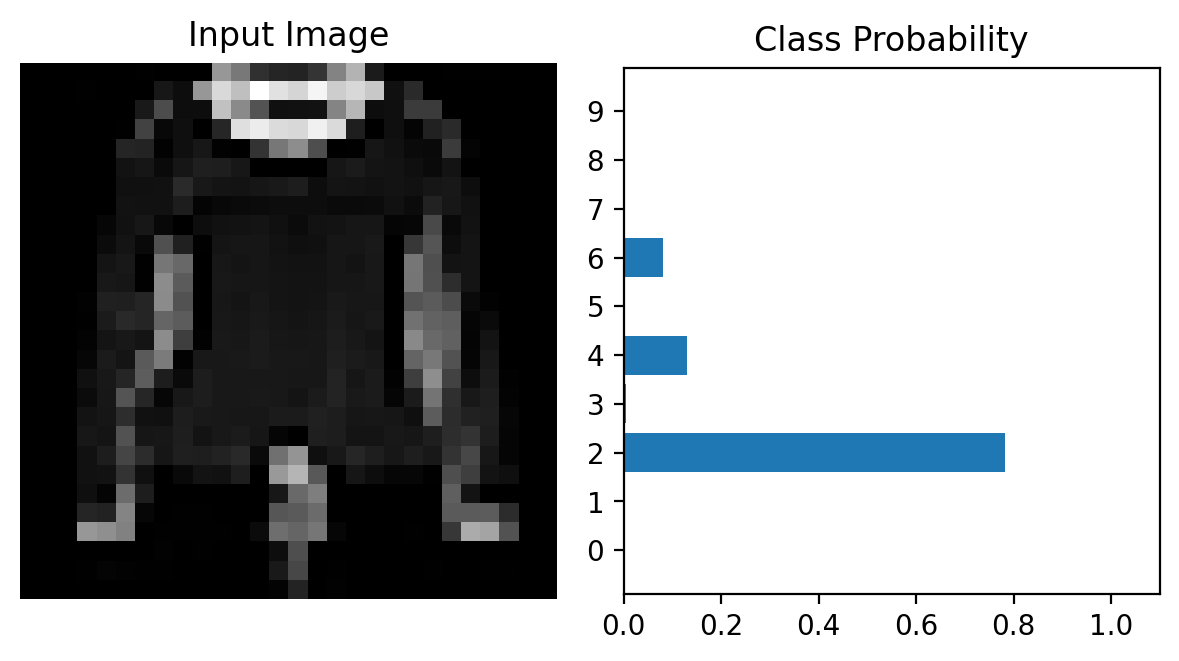

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

images,labels = next(iter(testloader))
img = images[0]

ps = torch.exp(model(img))
view_classify(img, ps , version="Fashion")


# ▶ Inference and Validation

Now that you have a trained network, you can use it for making predictions. This is typically called inference, a term borrowed from statistics. However, neural networks have a tendency to perform too well on the training data and aren't able to generalize to data that hasn't been seen before. This is called overfitting and it impairs inference performance. To test for overfitting while training, we measure the performance on data not in the training set called the validation set. We avoid overfitting through regularization such as dropout while monitoring the validation performance during training.


---



## Use .item()

1. tensor.item() là gì?

* .item() sẽ lấy giá trị Python (float, int, …) từ một tensor chỉ có 1 phần tử.

* Nó biến tensor → số thuần tuý của Python.
```python
import torch

a = torch.tensor([3.14])   # tensor có 1 phần tử
print(a)                   # tensor([3.1400])
print(a.item())            # 3.14 (kiểu float trong Python)
print(type(a.item()))      # <class 'float'>
```
2. Khi nào dùng .item()?

* Khi bạn muốn log, in ra màn hình, hoặc tính toán ngoài PyTorch (ví dụ cộng vào biến float của Python).

* Trong training loop thường thấy
```python
running_loss += loss.item()
```
vì loss là tensor, mà running_loss ta khai báo bằng 0.0 (float). Nếu cộng tensor vào float sẽ rắc rối → .item() giải quyết.

3. Khi nào KHÔNG cần .item()?

* Nếu bạn muốn giữ loss dưới dạng tensor để sau này stack lại (torch.stack) hoặc tính toán trong GPU.

* Khi vẽ với matplotlib, bạn có thể .cpu() tensor, không cần .item() hết từng cái.

## Use ps.topk - trả về k giá trị cao nhất

With the probabilities, we can get the most likely class using the ps.topk method. This returns the
 highest values. Since we just want the most likely class, we can use ps.topk(1). This returns a tuple of the top-values and the top-indices. If the highest value is the fifth element, we'll get back 4 as the index.

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.78MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.35MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.6MB/s]


In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [ ]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
print(top_class.shape)

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])
torch.Size([64, 1])


Now we can check if the predicted classes match the labels. This is simple to do by equating top_class and labels, but we have to be careful of the shapes. Here top_class is a 2D tensor with shape (64, 1) while labels is 1D with shape (64). To get the equality to work out the way we want <a>(Để có được sự bình đẳng diễn ra theo cách chúng ta muốn)</a>, top_class and labels must have the same shape.



---


If we do

**equals = top_class == labels**

equals will have shape (64, 64). What it's doing is comparing the one element in each row of top_class with each element in labels which returns 64 True/False boolean values for each row.

---
This happens because equals has type <a>torch.ByteTensor</a> but <a>torch.mean</a> isn't implemented for tensors with that type. So we'll need to convert equals to a <a>float tensor</a>. Note that when we take <a>torch.mean</a> it returns a scalar tensor, to get the actual value as a float we'll need to do <a>accuracy.item()</a>


In [ ]:
equals = top_class == labels.view(*top_class.shape)

In [ ]:
print(equals.type(torch.FloatTensor))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]])


In [ ]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 7.8125%


The network is untrained so it's making random guesses (đưa ra dự đoán ngẫu nhiên) and we should see an accurancy around 10%. Now, we need to train our network and include our validation pass. Since we're not updating our parameters in the validation pass, we can speed up by turning off gradients using <a>torch.no_grad()</a>
```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...

In [ ]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

model = Classifier().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in (range(epochs)):
  running_loss = 0
  for images, labels in tqdm(trainloader):
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    loss_ps = model(images)
    loss = criterion(loss_ps,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      for images, labels in tqdm(testloader):
        images = images.to(device)
        labels = labels.to(device)
        log_ps = model(images)
        test_loss += criterion(log_ps,labels)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


100%|██████████| 157/157 [00:02<00:00, 71.50it/s]


Epoch: 1/30..  Training Loss: 0.522..  Test Loss: 0.450..  Test Accuracy: 0.832


100%|██████████| 157/157 [00:01<00:00, 79.02it/s]


Epoch: 2/30..  Training Loss: 0.382..  Test Loss: 0.387..  Test Accuracy: 0.857


100%|██████████| 157/157 [00:01<00:00, 79.21it/s]


Epoch: 3/30..  Training Loss: 0.339..  Test Loss: 0.389..  Test Accuracy: 0.858


100%|██████████| 157/157 [00:02<00:00, 75.94it/s]


Epoch: 4/30..  Training Loss: 0.314..  Test Loss: 0.365..  Test Accuracy: 0.868


100%|██████████| 157/157 [00:02<00:00, 74.85it/s]


Epoch: 5/30..  Training Loss: 0.296..  Test Loss: 0.362..  Test Accuracy: 0.866


100%|██████████| 157/157 [00:01<00:00, 80.02it/s]


Epoch: 6/30..  Training Loss: 0.279..  Test Loss: 0.361..  Test Accuracy: 0.871


100%|██████████| 157/157 [00:01<00:00, 78.85it/s]


Epoch: 7/30..  Training Loss: 0.265..  Test Loss: 0.358..  Test Accuracy: 0.874


100%|██████████| 157/157 [00:01<00:00, 81.09it/s]


Epoch: 8/30..  Training Loss: 0.251..  Test Loss: 0.336..  Test Accuracy: 0.883


100%|██████████| 157/157 [00:02<00:00, 65.87it/s]


Epoch: 9/30..  Training Loss: 0.238..  Test Loss: 0.342..  Test Accuracy: 0.883


100%|██████████| 157/157 [00:02<00:00, 78.11it/s]


Epoch: 10/30..  Training Loss: 0.231..  Test Loss: 0.334..  Test Accuracy: 0.885


100%|██████████| 157/157 [00:01<00:00, 79.78it/s]


Epoch: 11/30..  Training Loss: 0.220..  Test Loss: 0.336..  Test Accuracy: 0.884


100%|██████████| 157/157 [00:02<00:00, 59.58it/s]


Epoch: 12/30..  Training Loss: 0.211..  Test Loss: 0.352..  Test Accuracy: 0.880


100%|██████████| 157/157 [00:01<00:00, 79.48it/s]


Epoch: 13/30..  Training Loss: 0.202..  Test Loss: 0.339..  Test Accuracy: 0.889


100%|██████████| 157/157 [00:01<00:00, 81.08it/s]


Epoch: 14/30..  Training Loss: 0.195..  Test Loss: 0.346..  Test Accuracy: 0.885


100%|██████████| 157/157 [00:02<00:00, 69.00it/s]


Epoch: 15/30..  Training Loss: 0.187..  Test Loss: 0.360..  Test Accuracy: 0.884


100%|██████████| 157/157 [00:01<00:00, 79.03it/s]


Epoch: 16/30..  Training Loss: 0.178..  Test Loss: 0.353..  Test Accuracy: 0.889


100%|██████████| 157/157 [00:01<00:00, 81.30it/s]


Epoch: 17/30..  Training Loss: 0.171..  Test Loss: 0.406..  Test Accuracy: 0.886


100%|██████████| 157/157 [00:01<00:00, 82.07it/s]


Epoch: 18/30..  Training Loss: 0.166..  Test Loss: 0.391..  Test Accuracy: 0.887


100%|██████████| 157/157 [00:02<00:00, 71.76it/s]


Epoch: 19/30..  Training Loss: 0.159..  Test Loss: 0.381..  Test Accuracy: 0.888


100%|██████████| 157/157 [00:02<00:00, 77.95it/s]


Epoch: 20/30..  Training Loss: 0.155..  Test Loss: 0.428..  Test Accuracy: 0.881


100%|██████████| 157/157 [00:01<00:00, 81.41it/s]


Epoch: 21/30..  Training Loss: 0.150..  Test Loss: 0.409..  Test Accuracy: 0.883


100%|██████████| 157/157 [00:02<00:00, 67.84it/s]


Epoch: 22/30..  Training Loss: 0.142..  Test Loss: 0.411..  Test Accuracy: 0.885


100%|██████████| 157/157 [00:02<00:00, 77.96it/s]


Epoch: 23/30..  Training Loss: 0.137..  Test Loss: 0.391..  Test Accuracy: 0.892


100%|██████████| 157/157 [00:01<00:00, 79.65it/s]


Epoch: 24/30..  Training Loss: 0.133..  Test Loss: 0.429..  Test Accuracy: 0.892


100%|██████████| 157/157 [00:02<00:00, 63.87it/s]


Epoch: 25/30..  Training Loss: 0.131..  Test Loss: 0.443..  Test Accuracy: 0.891


100%|██████████| 157/157 [00:01<00:00, 80.59it/s]


Epoch: 26/30..  Training Loss: 0.126..  Test Loss: 0.432..  Test Accuracy: 0.890


100%|██████████| 157/157 [00:01<00:00, 81.03it/s]


Epoch: 27/30..  Training Loss: 0.117..  Test Loss: 0.455..  Test Accuracy: 0.891


100%|██████████| 157/157 [00:02<00:00, 62.62it/s]


Epoch: 28/30..  Training Loss: 0.119..  Test Loss: 0.449..  Test Accuracy: 0.892


100%|██████████| 157/157 [00:01<00:00, 81.03it/s]


Epoch: 29/30..  Training Loss: 0.110..  Test Loss: 0.461..  Test Accuracy: 0.890


100%|██████████| 157/157 [00:01<00:00, 79.58it/s]

Epoch: 30/30..  Training Loss: 0.108..  Test Loss: 0.463..  Test Accuracy: 0.892


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

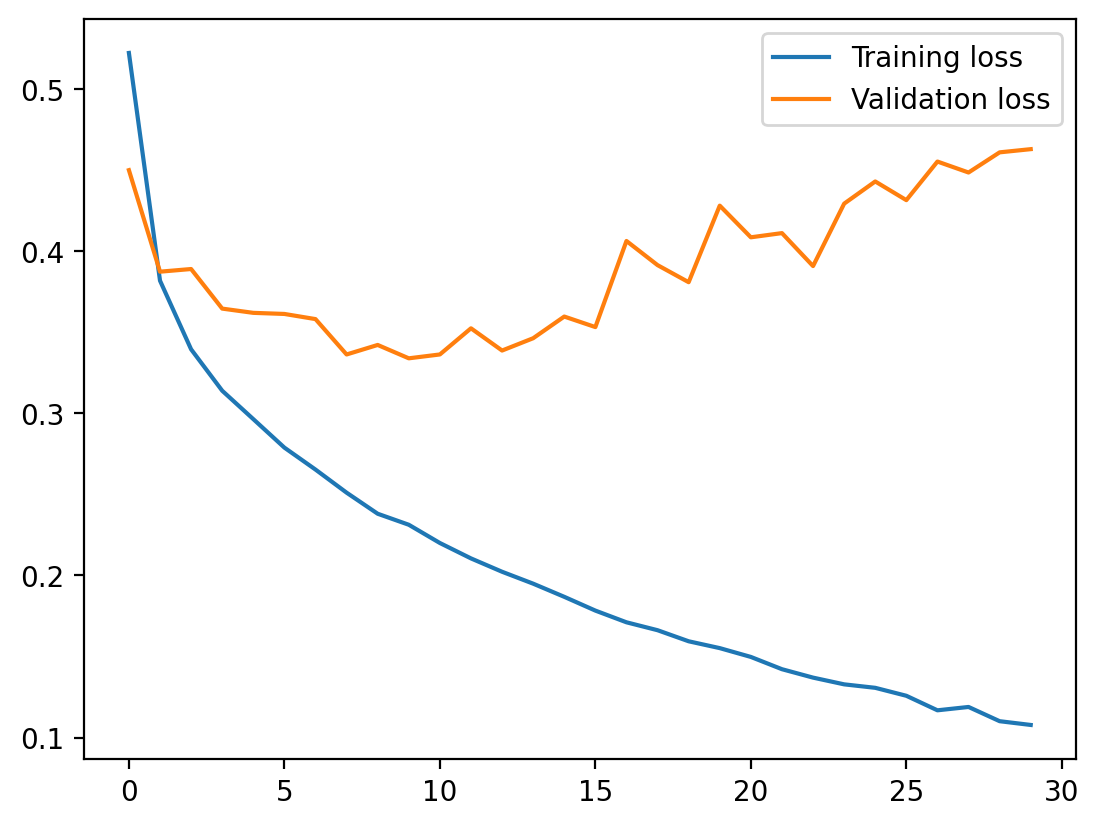

In [ ]:
train_losses_tensor = torch.tensor(train_losses)  # [epochs]
test_losses_tensor = torch.tensor(test_losses)
plt.plot(train_losses_tensor.cpu(), label="Training loss")
plt.plot(test_losses_tensor.cpu(), label="Validation loss")
plt.legend()
plt.show()


Đang bị overfitting

## Overfitting

Mạng học ngày càng tốt hơn trên tập huấn luyện, dẫn đến mất mát (training loss) giảm xuống. Tuy nhiên, nó bắt đầu gặp vấn đề trong việc tổng quát hóa dữ liệu ngoài tập huấn luyện, dẫn đến mất mát trên tập kiểm định (validation loss) tăng lên.Mục tiêu cuối cùng của bất kỳ mô hình học sâu nào là dự đoán tốt trên dữ liệu mới, vì vậy chúng ta nên cố gắng đạt mức mất mát kiểm định thấp nhất có thể. Một cách là dùng phiên bản của mô hình có mất mát kiểm định thấp nhất, ví dụ ở đây là vào khoảng 8–10 epoch huấn luyện. Chiến lược này gọi là early-stopping.Trong thực tế, bạn sẽ thường lưu mô hình lại trong lúc huấn luyện, rồi sau đó chọn mô hình có mất mát kiểm định thấp nhất.

Phương pháp phổ biến nhất để giảm overfitting (ngoài early-stopping) là dropout, nơi các đơn vị (neurons) được loại bỏ ngẫu nhiên. Điều này buộc mạng chia sẻ thông tin giữa các trọng số, giúp tăng khả năng tổng quát hóa trên dữ liệu mới.
Thêm dropout trong PyTorch rất đơn giản bằng cách dùng module <a>nn.Dropout</a>.

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

### model.eval() and model.train()

Trong quá trình huấn luyện, ta muốn dùng dropout để tránh overfitting, nhưng khi kiểm định (validation), kiểm tra (testing) hoặc dự đoán (inference), ta lại muốn dùng toàn bộ mạng. Vì vậy ta cần tắt dropout khi kiểm định và kiểm tra.
Để làm việc này, bạn dùng <a>model.eval()</a>. Điều này đặt mô hình vào chế độ đánh giá (evaluation mode), lúc này xác suất dropout bằng 0. Sau đó bạn có thể bật lại dropout bằng cách đặt mô hình về chế độ huấn luyện với <a>model.train()</a>.

Nói chung, vòng lặp kiểm định sẽ như sau:

* Tắt tính toán gradient bằng torch.no_grad().

* Đặt mô hình sang chế độ đánh giá bằng model.eval().

* Chạy dữ liệu qua mô hình và tính toán mất mát kiểm định, độ chính xác, v.v.

* Đặt mô hình về lại chế độ huấn luyện bằng model.train().

```python
# tắt gradient
with torch.no_grad():

    # đặt model về chế độ evaluation
    model.eval()

    # validation pass
    for images, labels in testloader:
        ...

# đặt model về chế độ train
model.train()


* model.train() → huấn luyện (bật dropout, batchnorm hoạt động trong chế độ huấn luyện).

* model.eval() → kiểm định / dự đoán (tắt dropout, batchnorm dùng giá trị trung bình đã học).

### Dropout

1. Dropout là gì?

* Dropout là một kỹ thuật regularization (chống overfitting).

* Ý tưởng: trong mỗi lần huấn luyện, một số neuron trong mạng sẽ bị "tắt" (set về 0) ngẫu nhiên.

* Điều này buộc các neuron còn lại phải học cách làm việc không phụ thuộc vào một vài neuron cụ thể, từ đó giúp mạng tổng quát hóa tốt hơn trên dữ liệu mới.

Ví dụ: nếu không có dropout, một số neuron có thể "dựa dẫm" vào nhau quá mức → dẫn đến overfitting.


---



2. Dropout trong PyTorch

Trong PyTorch, bạn dùng:
```python
nn.Dropout(p=0.5)
```
* p = xác suất dropout (tức là xác suất 1 neuron bị tắt).

* Thường dùng p=0.5 cho các fully-connected layers, và nhỏ hơn (vd: 0.2–0.3) cho convolutional layers.


---



3. Cách hoạt động trong các chế độ

* Trong huấn luyện (model.train()): dropout sẽ thực sự "tắt" ngẫu nhiên neuron theo xác suất p.

* Trong kiểm định/dự đoán (model.eval()): dropout không tắt neuron nữa, để dùng toàn bộ mô hình khi dự đoán.

---



In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.601..  Test Loss: 0.455..  Test Accuracy: 0.833
Epoch: 2/30..  Training Loss: 0.485..  Test Loss: 0.423..  Test Accuracy: 0.844
Epoch: 3/30..  Training Loss: 0.451..  Test Loss: 0.430..  Test Accuracy: 0.844
Epoch: 4/30..  Training Loss: 0.437..  Test Loss: 0.415..  Test Accuracy: 0.848
Epoch: 5/30..  Training Loss: 0.426..  Test Loss: 0.409..  Test Accuracy: 0.853
Epoch: 6/30..  Training Loss: 0.414..  Test Loss: 0.391..  Test Accuracy: 0.860
Epoch: 7/30..  Training Loss: 0.407..  Test Loss: 0.418..  Test Accuracy: 0.849
Epoch: 8/30..  Training Loss: 0.397..  Test Loss: 0.401..  Test Accuracy: 0.858
Epoch: 9/30..  Training Loss: 0.397..  Test Loss: 0.383..  Test Accuracy: 0.863
Epoch: 10/30..  Training Loss: 0.391..  Test Loss: 0.384..  Test Accuracy: 0.864
Epoch: 11/30..  Training Loss: 0.385..  Test Loss: 0.388..  Test Accuracy: 0.866
Epoch: 12/30..  Training Loss: 0.383..  Test Loss: 0.378..  Test Accuracy: 0.866
Epoch: 13/30..  Training Loss: 0.379.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

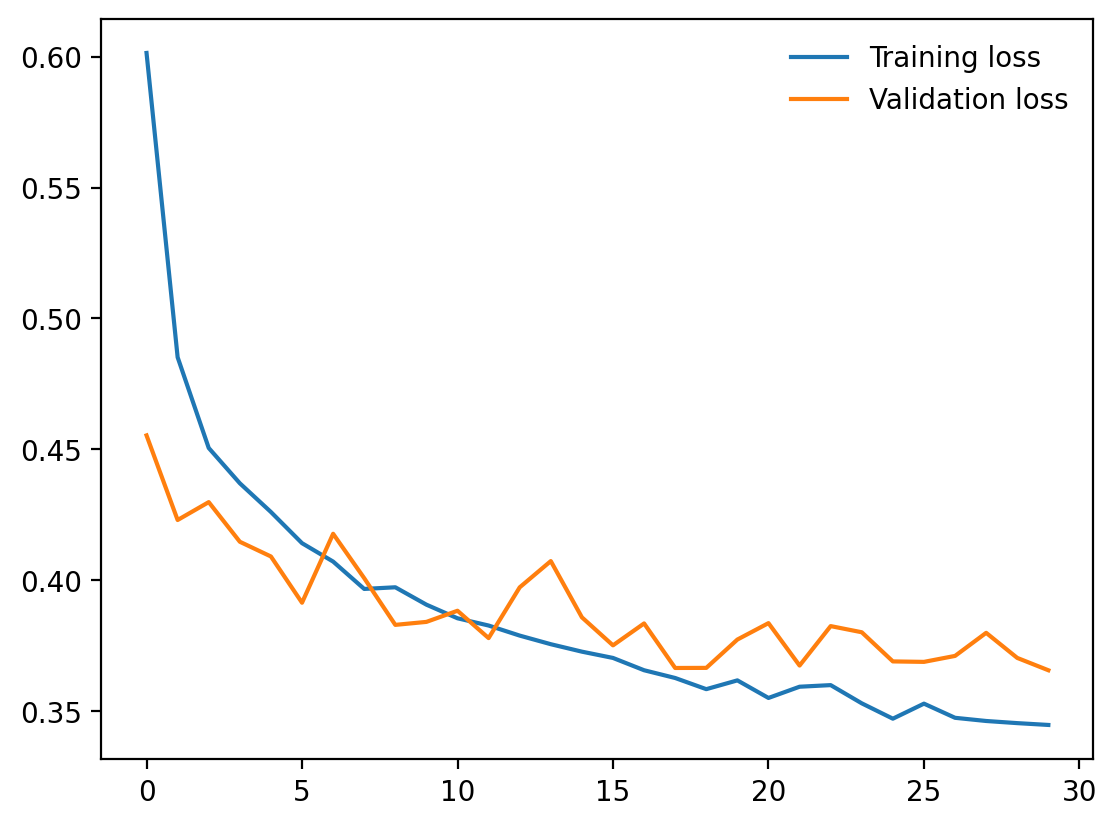

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

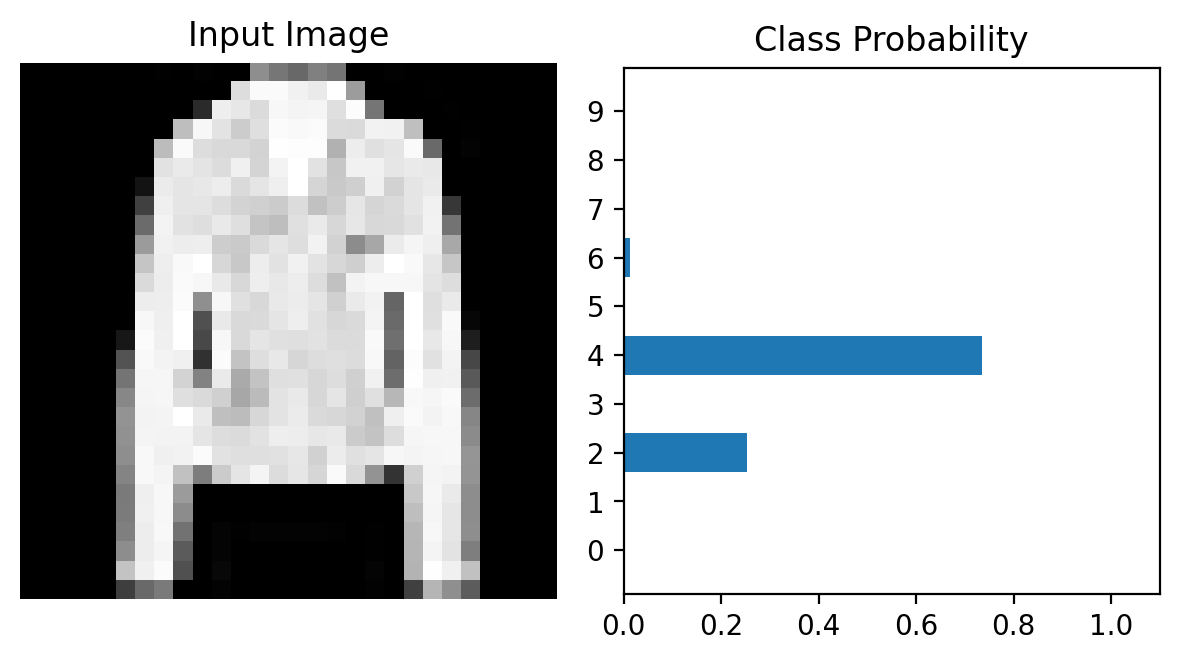

In [ ]:
# Test out your network!

model.eval()

images, labels = next(iter(testloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
view_classify(img.view(1, 28, 28), ps, version='Fashion')

### Ở inference (dự đoán, kiểm thử, validation) thì không dropout nữa — mình chỉ dùng toàn bộ mô hình.

1. Tại sao không dropout ở inference?

* Khi huấn luyện, dropout giúp tránh overfitting bằng cách "ép" mạng học nhiều đường đi khác nhau.

* Nhưng khi dự đoán trên dữ liệu mới, ta muốn tận dụng toàn bộ neuron để có dự đoán chính xác nhất.

* Nếu vẫn dropout ở inference, mô hình sẽ "tắt bớt" neuron → dự đoán sẽ không ổn định và giảm chính xác.

2. Ví dụ trực quan

* Giả sử bạn có một mạng với 100 neuron ở một lớp:

  * Train mode (có dropout p=0.5): mỗi lần huấn luyện chỉ ~50 neuron được bật, và chúng thay đổi qua mỗi batch.

  *Eval mode (không dropout): tất cả 100 neuron đều hoạt động, mô hình dùng hết "sức mạnh" đã học.

3. Ngoại lệ

  * Có một kỹ thuật gọi là MC Dropout (Monte Carlo Dropout), trong đó người ta giữ dropout cả ở inference nhưng chạy nhiều lần rồi lấy trung bình dự đoán.

* 👉 Mục đích: để ước lượng độ bất định (uncertainty) của mô hình, chứ không phải để tăng chính xác.

# ▶ Saving and loading networks

## Load Networks

In [ ]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    '''
    img: tensor ảnh (shape: 1x28x28)
    ps: tensor xác suất dự đoán (shape: 1x10)
    '''
    ps = ps.cpu().data.numpy().squeeze()  # chuyển về numpy

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)

    # Hiển thị ảnh gốc
    ax1.imshow(img.cpu().numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax1.set_title("Input Image")

    # Vẽ biểu đồ cột xác suất
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))  # label các class (0-9)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()


In [ ]:
class Classifier(nn.Module):
    def __init__(self, input: int, output: int, hidden_layers: list):
        super().__init__()


        self.fc1 = nn.Linear(input, hidden_layers[0])
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
        self.fc4 = nn.Linear(hidden_layers[2], output)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



---
## Save Networks







The parameters for Pytorch networks <a>are stored(được lưu trữ)</a> in a model's <a>state_dict</a>. We can see the state dict <a>contains(chứa)</a> the weight and bias matrices for each of our layers

In [ ]:
model = Classifier(784, 10, [ 256, 128, 64])
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


The simplest thing to do is simply save the state dict with <a>torch.save</a>. For example, we can save it to a file <a>'checkpoint.pth'</a>

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with <a>torch.load</a>

In [ ]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


And to load the state dict in to the network, you do <a>model.load_state_dict(state_dict)</a>

In [ ]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different architecture, this fails.

Dịch: Nghe có vẻ khá đơn giản, nhưng như thường lệ, nó phức tạp hơn một chút. Việc tải dict trạng thái chỉ hoạt động nếu kiến ​​trúc mô hình giống hệt với kiến ​​trúc điểm kiểm tra. Nếu tôi tạo một mô hình với kiến ​​trúc khác, thao tác này sẽ không thành công.

```python
# Try this
model = Classifier(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)
# error

This mean we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along(cùng) with the state dict. To do this, you build a dictionary with all the information you need to compeletely rebuild the model.



---
### Save
model.named_modules()




In [ ]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for name, each in model.named_modules() if isinstance(each, nn.Linear) and name != 'fc4'],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')



---

Kiểm tra

In [ ]:
for i , (name, each) in enumerate(model.named_modules()) :
  print(f"name{i} ", name)
  print(f"each{i}, {each}")

name0  
each0, Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
name1  fc1
each1, Linear(in_features=784, out_features=256, bias=True)
name2  fc2
each2, Linear(in_features=256, out_features=128, bias=True)
name3  fc3
each3, Linear(in_features=128, out_features=64, bias=True)
name4  fc4
each4, Linear(in_features=64, out_features=10, bias=True)
name5  dropout
each5, Dropout(p=0.2, inplace=False)


In [ ]:
for name, each in model.named_modules():
  if isinstance(each, nn.Linear) and name != 'fc4':
    print(each.out_features)

256
128
64




---


### Load

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints.

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Classifier(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])

    return model

In [ ]:
model = load_checkpoint('checkpoint.pth')
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


# ▶ Loading Image Data

## Import the library and introduction dataset

We'll be using a [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats) available from Kaggle. Here are a couple example images:

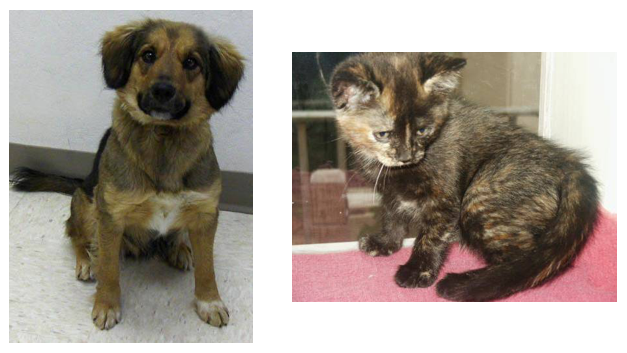

We'll use this dataset to train a neural network that can differentiate between cats and dogs.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

The easiet way to load image data is with <a>datasets.ImageFolder</a> from <a>torchvision</a>. In general you'll use <a>ImageFolder</a> like so:

<a>dataset = datasets.ImageFolder('path/to/data', transform=transform)</a>

Where <a>'path/to/data'</a> is the file path to the data directory and <a>transform</a> is a list of processing steps built with the <a>transforms</a> module from <a>torchvision</a>. ImageFolder expects the files and directories to be constructed like so (ImageFolder mong đợi các tập tin và thư mục được xây dựng như sau:):


*root/dog/xxx.png*

*root/dog/xxy.png*

*root/dog/xxz.png*


Where each class has it's own directory <a>(cat and dog)</a> for the images. The images are then labeled with the class taken from the directory name. So here, the <a>image 123.png</a> would be loaded with the class label cat. You can download the dataset already structured like this [from here](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip). I've also split it into a training set and test se

## Load dataset

In [ ]:
!unzip dogs-vs-cats.zip -d ./Cat_Dog_data
# Giải nén train.zip
!unzip /content/Cat_Dog_data/train.zip -d /content/Cat_Dog_data/train

# Giải nén test1.zip
!unzip /content/Cat_Dog_data/test1.zip -d /content/Cat_Dog_data/test


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/Cat_Dog_data/test/test1/5499.jpg  
  inflating: /content/Cat_Dog_data/test/test1/55.jpg  
  inflating: /content/Cat_Dog_data/test/test1/550.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5500.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5501.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5502.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5503.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5504.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5505.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5506.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5507.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5508.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5509.jpg  
  inflating: /content/Cat_Dog_data/test/test1/551.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5510.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5511.jpg  
  inflating: /content/Cat_Dog_data/

## Transforms

When you load in the data with <a>ImageFolder</a>, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with <a>transforms.Resize()</a> or crop with <a>transforms.CenterCrop(), transforms.RandomResizedCrop(), etc</a>. We'll also need to convert the images to PyTorch tensors with <a>transforms.ToTensor()</a>. Typically you'll combine these transforms into a pipeline with <a>transforms.Compose()</a>, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
```



## Data Loaders

With the <a>ImageFolder</a> loaded, you have to pass it to a <a>DataLoader</a>. The <a>DataLoader</a> takes a dataset (such as you would get from <a>ImageFolder</a>) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```
Here dataloader is a generator. To get data out of it, you need to loop through it or convert it to an iterator and call next().

```python
# Looping through it, get a batch on each loop
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```

In [ ]:
data_dir = '/content/Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


<Axes: >

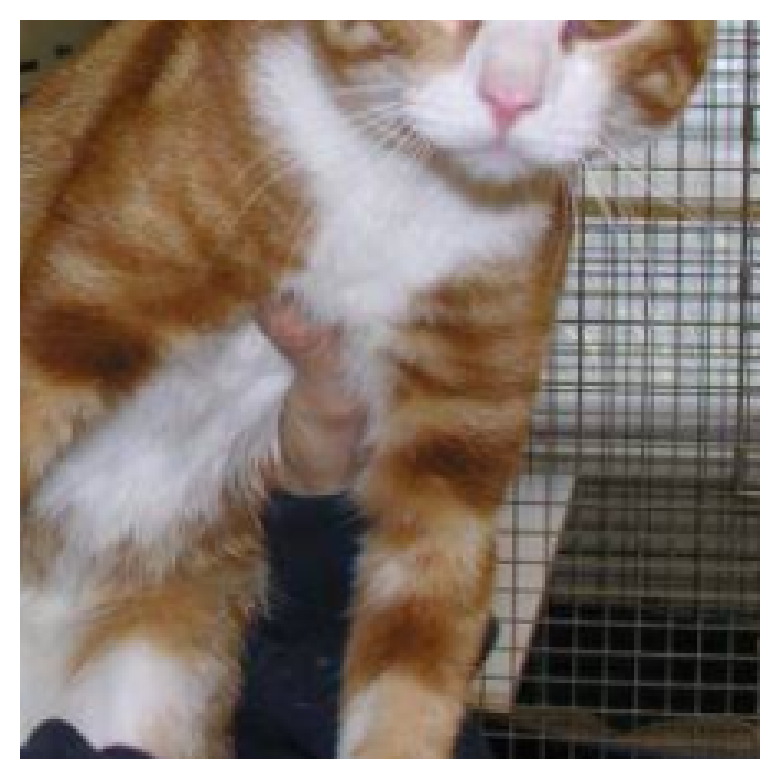

In [ ]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

## Data Augmentation - Tăng cường dữ liệu

A common strategy for training neural networks is to introduce randomness in the input data itself. For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip your images you would define your transforms like this:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],  [0.5, 0.5, 0.5])])
 ```   

 You'll also typically want to normalize images with transforms.Normalize. You pass in a list of means and list of standard deviations, then the color channels are normalized like so                                   
                                        
```python
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Subtracting mean centers the data around zero and dividing by std squishes the values to be between -1 and 1. Normalizing helps keep the network weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

When you're testing however, you'll want to use images that aren't altered other than normalizing. So, for validation/test images, you'll typically just resize and crop.

In [ ]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

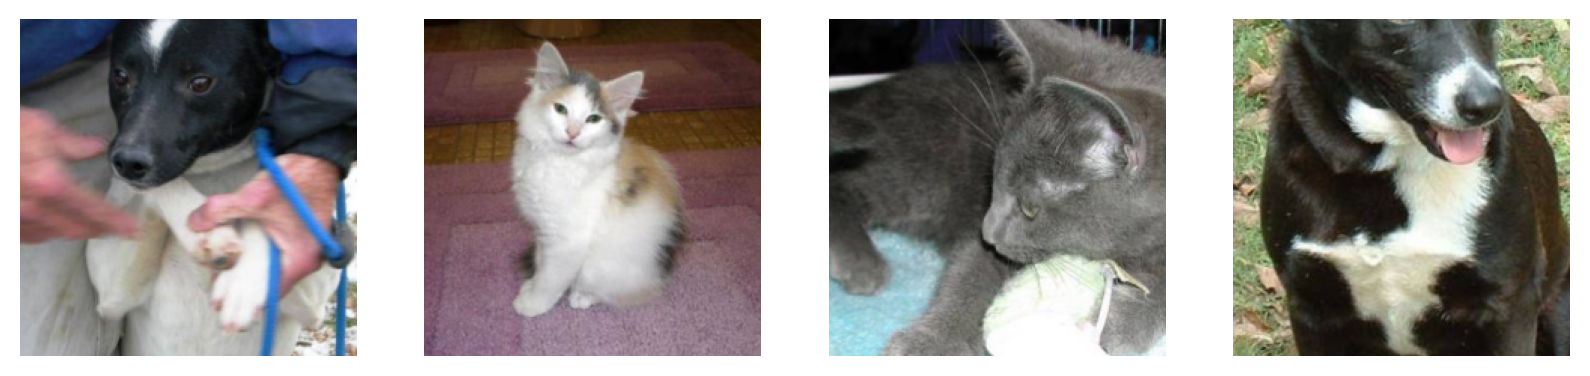

In [ ]:
# change this to the trainloader or testloader
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

# ▶ Transfer Learning

In this part, you'll learn how to use pre_trained networks to solved challenging problems in CV. Specifically, you'll use networks trained on [ImageNet](https://www.image-net.org/) [available from torchvision](https://docs.pytorch.org/docs/0.3.0/torchvision/models.html)

ImageNet is a massive dataset with over 1 million labeled images in 1000 categories. It's used to train deep neural networks using an architecture called convolutional layers. I'm not going to get into the details of convolutional networks here, but if you want to learn more about them, please [watch this](https://www.youtube.com/watch?v=2-Ol7ZB0MmU).

Once trained, these models work astonishingly well as feature detectors for images they weren't trained on. Using a pre-trained network on images not in the training set is called transfer learning. Here we'll use transfer learning to train a network that can classify our cat and dog photos with near perfect accuracy.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [ ]:
# Load data classify the cat and dog photos
!unzip dogs-vs-cats.zip -d ./Cat_Dog_data
# Giải nén train.zip
!unzip /content/Cat_Dog_data/train.zip -d /content/Cat_Dog_data/train

# Giải nén test1.zip
!unzip /content/Cat_Dog_data/test1.zip -d /content/Cat_Dog_data/test

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/Cat_Dog_data/test/test1/5499.jpg  
  inflating: /content/Cat_Dog_data/test/test1/55.jpg  
  inflating: /content/Cat_Dog_data/test/test1/550.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5500.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5501.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5502.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5503.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5504.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5505.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5506.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5507.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5508.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5509.jpg  
  inflating: /content/Cat_Dog_data/test/test1/551.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5510.jpg  
  inflating: /content/Cat_Dog_data/test/test1/5511.jpg  
  inflating: /content/Cat_Dog_data/

Most of the pretrained models require the input to be 224x224 images. Also, we'll need to match the normalization used when the models were trained. Each color channel was normalized separately, the means are <a>[0.485, 0.456, 0.406]</a> and the standard deviations are <a>[0.229, 0.224, 0.225]</a>.



---
## Tìm hiểu chi tiết tại sao lại có tham số mean = [0.485, 0.456, 0.406] và std = [0.229,0.224,0.225]



1. Vì sao phải chuẩn hoá ảnh?

* Ảnh gốc thường có giá trị pixel trong khoảng 0–255. Nếu chỉ chia cho 255 thì các giá trị về [0,1].

* Nhưng mỗi kênh màu (Red, Green, Blue) vẫn có phân bố khác nhau (ví dụ kênh đỏ thường sáng hơn kênh xanh).

* Mạng nơ-ron học nhanh và ổn định hơn nếu dữ liệu đầu vào có:

* Trung bình ≈ 0

* Độ lệch chuẩn ≈ 1


2. Tại sao mỗi kênh lại có mean và std riêng?

* Vì mỗi kênh màu trong ảnh tự nhiên có phân bố khác nhau.

* Người ta tính toán trung bình và độ lệch chuẩn trên toàn bộ tập ImageNet cho từng kênh:
```markdown
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
```
Khi chuẩn hoá, ta làm theo công thức:

$$
x' = \frac{x - \mu}{\sigma}
$$

→ Sau khi chuẩn hoá, cả 3 kênh đều có mean ≈ 0 và std ≈ 1.

3. Vì sao phải dùng đúng các giá trị này?

* Đây là thống kê được tính từ ImageNet – bộ dữ liệu mà hầu hết các mô hình pretrained (ResNet, VGG, EfficientNet, …) được huấn luyện.

* Nếu bạn dùng pretrained model, bạn phải chuẩn hoá ảnh với cùng mean và std thì đầu vào mới "giống" dữ liệu gốc mà model từng học. Nếu không, model sẽ thấy ảnh bị “lạ” và kết quả sẽ kém đi.

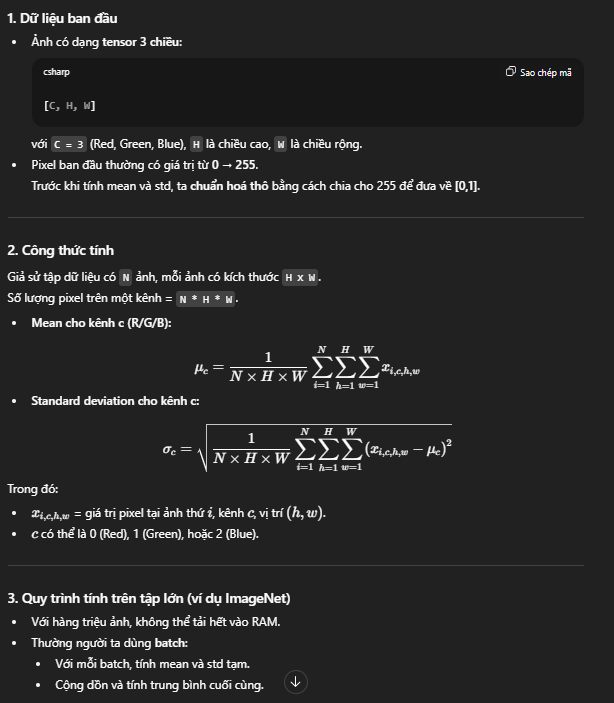

---

## Transforms

1. train_transforms (dùng cho dữ liệu huấn luyện)
```python
transforms.RandomRotation(30)
transforms.RandomResizedCrop(224)
transforms.RandomHorizontalFlip()
```
* RandomRotation(30): xoay ảnh ngẫu nhiên trong khoảng ±30 độ.
* RandomResizedCrop(224): cắt một vùng ngẫu nhiên từ ảnh gốc rồi resize về 224×224.
→ Tăng tính đa dạng dữ liệu, giúp mô hình generalize tốt hơn (không bị lệ thuộc vào vị trí/scale cố định).

* RandomHorizontalFlip(): lật ngang ngẫu nhiên (ví dụ ảnh con mèo lật trái phải vẫn là mèo).

👉 Mục đích: data augmentation để mô hình học được nhiều biến thể khác nhau.

2. test_transforms (dùng cho dữ liệu kiểm thử/validation)

```python
transforms.Resize(255)
transforms.CenterCrop(224)
```

* Resize(255): phóng/thu ảnh sao cho cạnh ngắn nhất = 255 pixel, cạnh kia giữ tỉ lệ.

* CenterCrop(224): sau đó cắt phần trung tâm của ảnh với kích thước 224×224.

👉 Ở đây KHÔNG dùng random nữa vì:

Trong test/validation, ta muốn đánh giá mô hình trên dữ liệu “ổn định” và có thể tái lặp.

Nếu dùng random như train thì mỗi lần test ra kết quả khác nhau → không chuẩn để so sánh.

3. Vì sao lại chọn Resize(255) trước rồi mới CenterCrop(224)?

* Khi resize về chiều ngắn nhất = 255, ta đảm bảo rằng ảnh đủ lớn để cắt ra 224×224 ở giữa.

* Nếu resize thẳng về 224, có thể ảnh bị méo tỉ lệ hoặc không còn chỗ để crop.

* Đây là cách chuẩn trong training ImageNet với ResNet, VGG…

In [ ]:
data_dir = 'Cat_Dog_data'

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle= True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 64)

We can load in a model such as [DenseNet](https://docs.pytorch.org/docs/0.3.0/torchvision/models.html#id5). Let's print out the model architecture so we can see what's going on.

In [ ]:
model = models.densenet121(pretrained=True)
model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:01<00:00, 25.7MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

✅ Chúng ta sẽ thay đổi lớp đầu ra

* Ở Mạng DenseNet,Khi bạn model = models.densenet121(pretrained=True), mô hình này đã được huấn luyện trên ImageNet (1.2 triệu ảnh, 1000 lớp).

* Toàn bộ backbone (từ convolution → dense blocks → pooling) đã học được feature extractor rất mạnh.

* Phần cuối của mô hình là fully connected (classifier) với Linear(1024 → 1000) (ứng với 1000 lớp của ImageNet).

* Phần 1024 (output của DenseNet feature extractor) vẫn giữ nguyên, vì nó là kích thước đầu ra cố định của DenseNet.

* Bạn chỉ thay thế phần classifier ban đầu (1024 → 1000) bằng classifier mới (1024 → 500 → 2).

* Có bị “mất” tham số đã pretrain không?

  * Không mất backbone: tất cả trọng số convolution, dense blocks, pooling… vẫn giữ nguyên → đó mới là phần nặng nhất của mạng.

  * Chỉ bỏ classifier cũ (1024 → 1000) vì nó gắn với 1000 lớp của ImageNet, vốn không liên quan đến bài toán của bạn.

  * Classifier mới (1024 → 500 → 2) sẽ được train lại từ đầu (random init), để phù hợp với dữ liệu và số lớp của bạn.

In [ ]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

model.classifier = classifier

## Use CUDA

PyTorch, along with pretty much every other deep learning framework, uses CUDA to efficiently compute the forward and backwards passes on the GPU. In PyTorch, you move your model parameters and other tensors to the GPU memory using <a>model.to('cuda')</a>. You can move them back from the GPU with <a>model.to('cpu')</a> which you'll commonly do when you need to operate on the network output outside of PyTorch. As a demonstration of the increased speed, I'll compare how long it takes to perform a forward and backward pass with and without a GPU.

In [ ]:
import time
from tqdm import tqdm

In [ ]:
for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in tqdm(enumerate(trainloader)):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break

    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

3it [01:43, 34.45s/it]

Device = cpu; Time per batch: 7.381 seconds


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

You can write device agnostic code which will automatically use CUDA if it's enabled like so:

```python
# at beginning of the script
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

...

# then whenever you get a new Tensor or Module
# this won't copy if they are already on the desired device
input = data.to(device)
model = MyModule(...).to(device)
```




In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

In [ ]:

epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)

                    test_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()